In [62]:
import sys
import os
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path + "/../../src/simulations_v2")
from stochastic_simulation import StochasticSimulation
from multi_group_simulation import MultiGroupSimulation
from load_params import load_params, load_multigroup_params



In [63]:
group_params, group_names, interactions_mtx = load_multigroup_params("./in_person_multigroup.yaml")

In [64]:
multigroup_sim = MultiGroupSimulation(group_params, interactions_mtx)

In [65]:
low_contact_params = load_params("./low_contact_ugs.yaml")[1]

In [66]:
group_params[0]['initial_R_count']

1463

In [67]:
sim_dfs = [[], []]
nreps = 20
horizon = 7 * 12

for _ in range(nreps):
    multigroup_sim.run_new_trajectory(horizon)
    for idx, sim in enumerate(multigroup_sim.sims):
        sim_dfs[idx].append(sim.sim_df)

Text(0.5,1,'Low-Contact Student Infections without High-Contact Immunity')

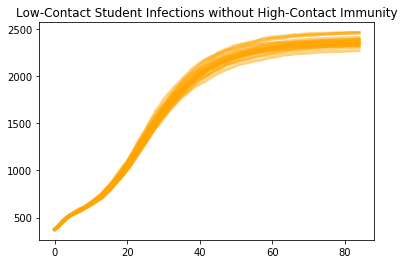

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
for idx in range(20):
    sim_dfs[1][idx][['cumulative_mild', 'cumulative_severe']].sum(axis=1).plot(linewidth=3,alpha=0.5,color='orange')
plt.title("Low-Contact Student Infections without High-Contact Immunity")

In [69]:
multigroup_sim.sims[1].pop_size

3949

In [70]:
group_params[0]

{'ID_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
 'SyID_mild_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
 'SyID_severe_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
 'cases_isolated_per_contact': 0,
 'cases_quarantined_per_contact': 0,
 'contact_trace_testing_frac': 1,
 'contact_tracing_delay': 1,
 'daily_outside_infection_p': 7.1e-05,
 'days_between_tests': 1,
 'expected_contacts_per_day': 7.36,
 'exposed_infection_p': 0.09,
 'exposed_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
 'initial_E_count': 0,
 'initial_ID_count': 0,
 'initial_ID_prevalence': 0.04,
 'initial_R_count': 1463,
 'initial_SyID_mild_count': 0,
 'initial_SyID_severe_count': 0,
 'initial_pre_ID_count': 0,
 'max_time_ID': 8,
 'max_time_SyID_mild': 20,
 'max_time_SyID_severe': 20,
 'max_time_exposed': 7,
 'max_time_pre_ID': 4,
 'mild_severity_levels'

In [71]:
group_params[0]['initial_R_count'] = group_params[0]['population_size']
group_params[0]['initial_ID_prevalence'] = 0

multigroup_sim = MultiGroupSimulation(group_params, interactions_mtx)

sim_dfs_ = [[], []]
nreps = 20
horizon = 7 * 12

for _ in range(nreps):
    multigroup_sim.run_new_trajectory(horizon)
    for idx, sim in enumerate(multigroup_sim.sims):
        sim_dfs_[idx].append(sim.sim_df)

Text(0.5,1,'Low-Contact Student Infections with High-Contact Immunity')

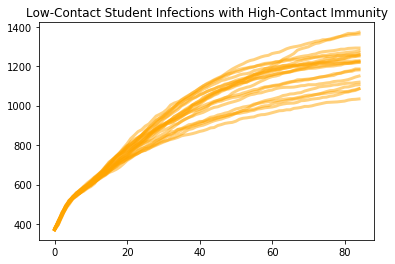

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
for idx in range(20):
    sim_dfs_[1][idx][['cumulative_mild', 'cumulative_severe']].sum(axis=1).plot(linewidth=3,alpha=0.5,color='orange')
plt.title("Low-Contact Student Infections with High-Contact Immunity")